In [955]:
#upgrade the package

import sys
!{sys.executable} -m pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in c:\users\quoct\anaconda3\lib\site-packages (3.5.1)


    In the operation of business, there are many factors that affects to the revenue of the cooperation. On of it is attriiton. Attrition is not only has the bad imnpact to the business about human resources but also increase the cost such as the cost of business disruption, hiring new staff and training new staff. Therefore, it is necessary to understand the motivation of lefting of employees to minimise the attrition in the business.
    In this context, a dataset of IBM will be used to analyse the attrition of employees. This project will apply different classification technique to predict if an employee is likely to quit could greatly increase the HR’s ability to intervene on time and remedy the situation to prevent attrition.
    The dataset contain more than 30 different attributes and more than 1500 entries. This project will focus on 2 mains content of analyzing the trend of attrition based on other attributes and predicting if an employee is likely to quit the job.
    In able to do that. 2 big question need to be answer are:
    - What are the factors that drive to the decision of employees?
    - Can we predict the motivation of employees?

In [956]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [957]:
#overview the data
data = pd.read_csv("C:/upei/BA project/WA_Fn-UseC_-HR-Employee-Attrition.csv", delimiter=',')
df = pd.DataFrame(data)
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing value in the dataset

In [958]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 2 types of attributes in this dataset which are: numeric cand category

In [959]:
#discribe the data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [960]:
#overview the first couples rows of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [961]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [962]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [963]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [964]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [965]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [966]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [967]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [968]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [969]:
cat= data.select_dtypes(include=object).columns.tolist()
print(cat)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [970]:
#Count the total element of each rank in the categoty attributes
cat_df=pd.DataFrame(data[cat].melt(var_name='column', value_name='value').value_counts()).sort_values(by = ['column']).T
for i in cat:
    print('\033[1m' + i)   
    display(cat_df[i])

Attrition


value,No,Yes
0,1233,237


BusinessTravel


value,Non-Travel,Travel_Rarely,Travel_Frequently
0,150,1043,277


Department


value,Human Resources,Research & Development,Sales
0,63,961,446


EducationField


value,Technical Degree,Marketing,Human Resources,Life Sciences,Other,Medical
0,132,159,27,606,82,464


Gender


value,Female,Male
0,588,882


JobRole


value,Sales Representative,Manager,Healthcare Representative,Research Director,Manufacturing Director,Research Scientist,Human Resources,Sales Executive,Laboratory Technician
0,83,102,131,80,145,292,52,326,259


MaritalStatus


value,Divorced,Single,Married
0,327,470,673


Over18


value,Y
0,1470


OverTime


value,Yes,No
0,416,1054


In [971]:
#droping the columns with identical values
df = df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeCount', 'EmployeeNumber'])

In [972]:
#Caculating the cumulative percentage in the attrition attribue
at_percent = df['Attrition'].value_counts(normalize=True).mul(100).round(decimals=2).rename('Percent').reset_index()
print(at_percent)

  index  Percent
0    No    83.88
1   Yes    16.12


In [973]:
at_percent['Attrition']=['Former' if i=='Yes' else 'Current' for i in at_percent['index']]
print(at_percent)

  index  Percent Attrition
0    No    83.88   Current
1   Yes    16.12    Former


Text(0, 0.5, 'Percent')

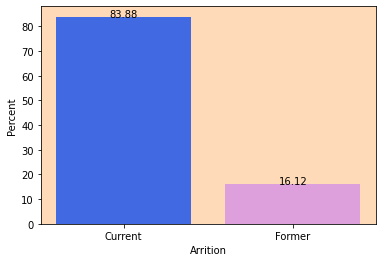

In [974]:
#visualise the cumulative percentage with bar graph
plt.axes().set_facecolor("#FFDAB9")
x = at_percent['Attrition']
y = at_percent['Percent']
plt.bar(x,y, color=['#4169E1','#DDA0DD'])
for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
plt.xlabel('Arrition')
plt.ylabel('Percent')

In [975]:
#calculating the cummulative percentage of attrition acording to department
dep_at = df[df['Attrition'] == 'Yes']
depAt_percent = dep_at['Department'].value_counts(normalize=True).mul(100).round(decimals=2).rename('Percent').reset_index()
print(depAt_percent)

                    index  Percent
0  Research & Development    56.12
1                   Sales    38.82
2         Human Resources     5.06


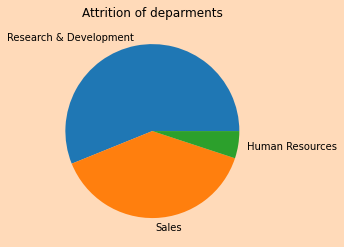

In [976]:
fig = plt.figure()
x= depAt_percent['Percent']
plt.pie(depAt_percent['Percent'],labels=depAt_percent['index'])
plt.title('Attrition of deparments')
fig.set_facecolor("#FFDAB9")

We can see that the research and developemnt department had the highets rate of attrition in the company, then Sales while Human resouces is the deparment which had the lowest rate of attrition

In [977]:
#prepare the data to analyse the the defferent in the attrition of male and female acording to department
df['Department'].unique()
attrition=df[df['Attrition']=='Yes']
male=attrition[attrition['Gender']=='Male']
female=attrition[attrition['Gender']=='Female']

In [978]:
dep_genM_at=male[male['Attrition']=='Yes'].groupby(by=['Department'])
male_at=pd.DataFrame(dep_genM_at['Department'].count().reset_index(name='count'))
dep_genF_at=female[female['Attrition']=='Yes'].groupby(by=['Department'])
female_at=pd.DataFrame(dep_genF_at['Department'].count().reset_index(name='count'))
print(male_at)
print(female_at)

               Department  count
0         Human Resources      6
1  Research & Development     90
2                   Sales     54
               Department  count
0         Human Resources      6
1  Research & Development     43
2                   Sales     38


In [979]:
male_at['Percent']=male_at['count']/male_at['count'].sum()*100
female_at['Percent']=female_at['count']/female_at['count'].sum()*100
print(female_at['Percent'].round(decimals=2))
print(male_at['Percent'].round(decimals=2))

0     6.90
1    49.43
2    43.68
Name: Percent, dtype: float64
0     4.0
1    60.0
2    36.0
Name: Percent, dtype: float64


<Figure size 720x360 with 0 Axes>

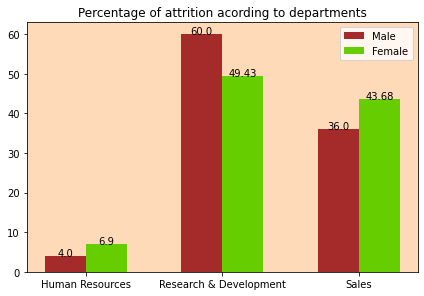

In [980]:
#Visualizing
plt.figure(figsize=(10, 5))
index=np.arange(3)
bar_width = 0.3
fig, ax = plt.subplots()

r1=plt.bar(index,male_at['Percent'],bar_width,color='#A52A2A',label = 'Male')
value = male_at['Percent'].round(2)
for i in range(3):
        plt.text(i, value[i], value[i], ha = 'center')
        
r2=plt.bar(index+bar_width,female_at['Percent'],bar_width,color='#66CD00',label = 'Female')
value = female_at['Percent'].round(2)
for i in range(3):
        plt.text(i+bar_width, value[i], value[i], ha = 'center')
plt.xticks(index+0.15 , male_at['Department'],
      color = 'black',rotation = 0, horizontalalignment = 'center')

ax = plt.gca()
ax.set_facecolor('#FFDAB9')
plt.legend()
plt.tight_layout()
plt.title('Percentage of attrition acording to departments')
plt.show()

We can see that there are the different in attrition acording to gender between department. The attrition rate in of male is higher than female in Research and Development deparment, in it is opposite in the others. 

In [981]:
#prepating data for visualizing the attrition rate acording to education
edu=df.groupby(by='EducationField')
edu_field=pd.DataFrame(edu['Department'].count().reset_index(name='count'))
eduAt=attrition.groupby(by='EducationField')
edu_at=pd.DataFrame(eduAt['Department'].count().reset_index(name='count'))

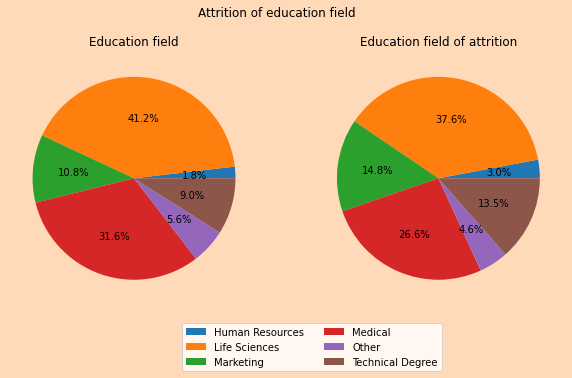

In [982]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.pie(edu_field['count'],autopct='%1.1f%%')
ax2.pie(edu_at['count'],autopct='%1.1f%%')

ax1.title.set_text('Education field')
ax2.title.set_text('Education field of attrition')

plt.suptitle('Attrition of education field')
plt.legend(labels=edu_field['EducationField'], loc='upper center', 
           bbox_to_anchor=(0.001, -0.05), ncol=2)
fig.set_facecolor("#FFDAB9")

There is not much different in the dicision of staying or quiting the job of different Education Field. It is likely that the employees who have degreed on the Life Since and Medical had a bigger chance of quiting the job. 

In [983]:
#prepating data for visualizing the attrition rate acording to job role

role=df.groupby(by='JobRole')
role_gen=pd.DataFrame(role['JobRole'].count().reset_index(name='count'))
roleAt=attrition.groupby(by='JobRole')
role_at=pd.DataFrame(eduAt['JobRole'].count().reset_index(name='count'))

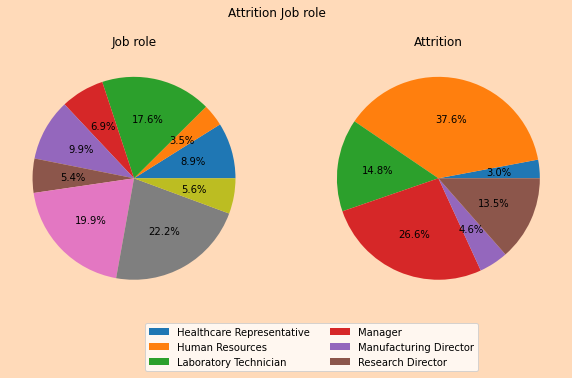

In [984]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.pie(role_gen['count'],autopct='%1.1f%%')
ax2.pie(role_at['count'],autopct='%1.1f%%')

ax1.title.set_text('Job role')
ax2.title.set_text('Attrition')

plt.suptitle('Attrition Job role')
plt.legend(labels=role_gen['JobRole'], loc='upper center', 
           bbox_to_anchor=(0.001, -0.05), ncol=2)
fig.set_facecolor("#FFDAB9")

by looking at the bar graph, it is easily to acknowlege that employees who work were HR and manager has a high chance of quitting the job rather than the others role while the HR employees only accounted for only a small part of total employees. Next, the managers are the ones who also likely to quit the job. 

In [985]:
#prepating data for visualizing the attrition rate acording to job role Marital Status

married=df.groupby(by='MaritalStatus')
married_gen=pd.DataFrame(married['MaritalStatus'].count().reset_index(name='count'))
marriedAt=attrition.groupby(by='MaritalStatus')
married_at=pd.DataFrame(marriedAt['MaritalStatus'].count().reset_index(name='count'))

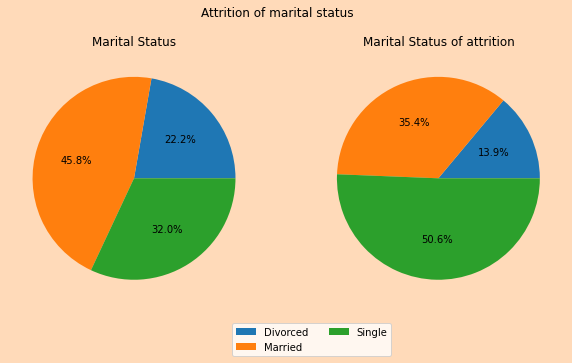

In [986]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.pie(married_gen['count'],autopct='%1.1f%%')
ax2.pie(married_at['count'],autopct='%1.1f%%')

ax1.title.set_text('Marital Status')
ax2.title.set_text('Marital Status of attrition')

plt.suptitle('Attrition of marital status')
plt.legend(labels=married_gen['MaritalStatus'], loc='upper center', 
           bbox_to_anchor=(0.001, -0.05), ncol=2)
fig.set_facecolor("#FFDAB9")

The graphs above show that the employees who are single had a chance of quitting the job while the married employeess accounted the most majority with more than 45%.

In [987]:
#prepating data for visualizing the attrition rate of working overtime employees

overtime=df.groupby(by='OverTime')
overtime=pd.DataFrame(overtime['OverTime'].count().reset_index(name='count'))
overtimeAt=attrition.groupby(by='OverTime')
overtime_At=pd.DataFrame(overtimeAt['OverTime'].count().reset_index(name='count'))

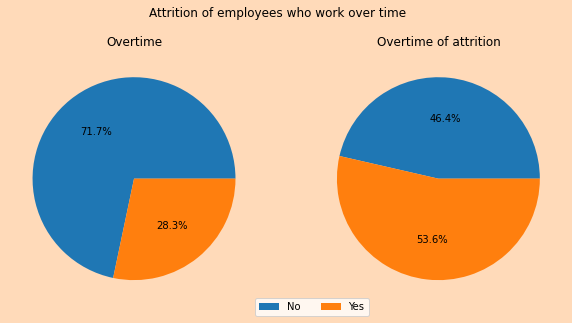

In [988]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.pie(overtime['count'],autopct='%1.1f%%')
ax2.pie(overtime_At['count'],autopct='%1.1f%%')

ax1.title.set_text('Overtime')
ax2.title.set_text('Overtime of attrition')

plt.suptitle('Attrition of employees who work over time')
plt.legend(labels=overtime['OverTime'], loc='upper center', 
           bbox_to_anchor=(0.001, 0.05), ncol=2)
fig.set_facecolor("#FFDAB9")

The graphs above show that the majority of employees did not work overtime. However, the attrition proportion of employees who worked overtime is higher the ones who did not. 

In [989]:
#prepating data for visualizing the attrition rate of working overtime employees according to Marital Status

overtime= df[df['OverTime'] == 'Yes']
marriedOver=overtime.groupby(by='MaritalStatus')
married_Over=pd.DataFrame(marriedOver['MaritalStatus'].count().reset_index(name='count'))
attritionOver = attrition[attrition['OverTime'] == 'Yes']
AtmarriedOver=attritionOver.groupby(by='MaritalStatus')
Atmarried_Over=pd.DataFrame(AtmarriedOver['MaritalStatus'].count().reset_index(name='count'))
print(Atmarried_Over)

  MaritalStatus  count
0      Divorced     19
1       Married     43
2        Single     65


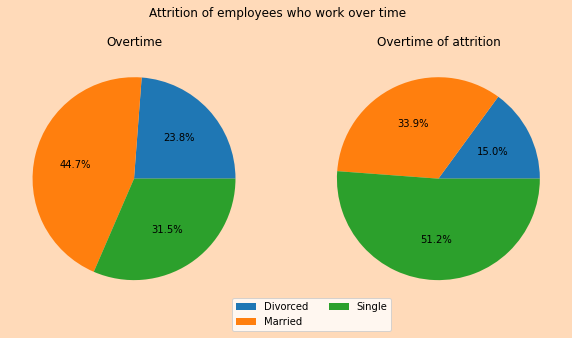

In [990]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.pie(married_Over['count'],autopct='%1.1f%%')
ax2.pie(Atmarried_Over['count'],autopct='%1.1f%%')

ax1.title.set_text('Overtime')
ax2.title.set_text('Overtime of attrition')

plt.suptitle('Attrition of employees who work over time')
plt.legend(labels=married_Over['MaritalStatus'], loc='upper center', 
           bbox_to_anchor=(0.001, 0.05), ncol=2)
fig.set_facecolor("#FFDAB9")

As can be seen in the graphs obove, the married emplopyess are the one who likely to work overtime. However, the single employess who worked overtime are the one have the highest attrition porportion in the company.

In [991]:
#prepating data for visualizing the attrition rate of Business travel employees according to Marital Status

divorce=attrition[attrition['MaritalStatus']=='Divorced']
single=attrition[attrition['MaritalStatus']=='Single']
married=attrition[attrition['MaritalStatus']=='Married']

In [992]:
divorceAt=divorce.groupby(by=['BusinessTravel'])
divorce_at=pd.DataFrame(divorceAt['BusinessTravel'].count().reset_index(name='count'))
singleAt=single.groupby(by=['BusinessTravel'])
single_at=pd.DataFrame(singleAt['BusinessTravel'].count().reset_index(name='count'))
marriedAt=married.groupby(by=['BusinessTravel'])
married_at=pd.DataFrame(marriedAt['BusinessTravel'].count().reset_index(name='count'))
print(divorce_at)
print(single_at)
print(married_at)

      BusinessTravel  count
0         Non-Travel      1
1  Travel_Frequently     13
2      Travel_Rarely     19
      BusinessTravel  count
0         Non-Travel      8
1  Travel_Frequently     37
2      Travel_Rarely     75
      BusinessTravel  count
0         Non-Travel      3
1  Travel_Frequently     19
2      Travel_Rarely     62


In [993]:
divorce_at['Percent']=divorce_at['count']/divorce_at['count'].sum()*100
single_at['Percent']=single_at['count']/single_at['count'].sum()*100
married_at['Percent']=married_at['count']/married_at['count'].sum()*100
print(divorce_at)
print(single_at)
print(married_at)

      BusinessTravel  count    Percent
0         Non-Travel      1   3.030303
1  Travel_Frequently     13  39.393939
2      Travel_Rarely     19  57.575758
      BusinessTravel  count    Percent
0         Non-Travel      8   6.666667
1  Travel_Frequently     37  30.833333
2      Travel_Rarely     75  62.500000
      BusinessTravel  count    Percent
0         Non-Travel      3   3.571429
1  Travel_Frequently     19  22.619048
2      Travel_Rarely     62  73.809524


<Figure size 720x360 with 0 Axes>

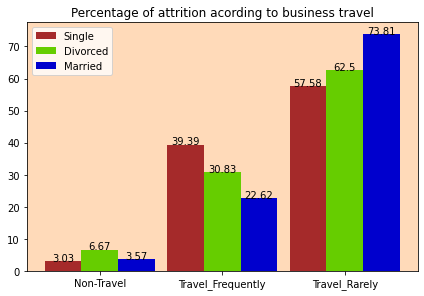

In [994]:
plt.figure(figsize=(10, 5))
index=np.arange(3)
bar_width = 0.3
fig, ax = plt.subplots()

r1=plt.bar(index,divorce_at['Percent'],bar_width,color='#A52A2A',label = 'Single')
value = divorce_at['Percent'].round(2)
for i in range(3):
        plt.text(i, value[i], value[i], ha = 'center')
        
r2=plt.bar(index+bar_width,single_at['Percent'],bar_width,color='#66CD00',label = 'Divorced')
value = single_at['Percent'].round(2)
for i in range(3):
        plt.text(i+bar_width, value[i], value[i], ha = 'center')
        
r3=plt.bar(index+bar_width*2,married_at['Percent'],bar_width,color='mediumblue',label = 'Married')
value = married_at['Percent'].round(2)
for i in range(3):
        plt.text(i+bar_width*2, value[i], value[i], ha = 'center')

plt.xticks(index+0.30 , divorce_at['BusinessTravel'],
      color = 'black',rotation = 0, horizontalalignment = 'center')

ax = plt.gca()
ax.set_facecolor('#FFDAB9')
plt.legend()
plt.tight_layout()
plt.title('Percentage of attrition acording to business travel')
plt.show()

By looking at the bar graph above, the married employees who did not travel a lot have the highest percentage of the attrition. The single employees who had a lot of business travel would be the ones who quitting the job. In addition, the divorced employees who did not travel is a group of likely to quit the job.

In [995]:
no_attrition=df[df['Attrition']=='No']

In [996]:
#prepating data for visualizing the monthly income according to deparment


at_sale = attrition[attrition['Department']=='Sales']
at_RnD = attrition[attrition['Department']=='Research & Development']
at_HR = attrition[attrition['Department']=='Human Resources']

no_sale = no_attrition[no_attrition['Department']=='Sales']
no_RnD = no_attrition[no_attrition['Department']=='Research & Development']
no_HR = no_attrition[no_attrition['Department']=='Human Resources']

In [997]:
at_income=pd.DataFrame({'Average_income':[at_sale['MonthlyIncome'].mean(),at_RnD['MonthlyIncome'].mean(),at_HR['MonthlyIncome'].mean()]})
noAt_income=pd.DataFrame({'Average_income':[no_sale['MonthlyIncome'].mean(),no_RnD['MonthlyIncome'].mean(),no_HR['MonthlyIncome'].mean()]})
print(at_income['Average_income'].round(2))
print(noAt_income['Average_income'].round(2))

0    5908.46
1    4108.08
2    3715.75
Name: Average_income, dtype: float64
0    7232.24
1    6630.33
2    7345.98
Name: Average_income, dtype: float64


<Figure size 1440x360 with 0 Axes>

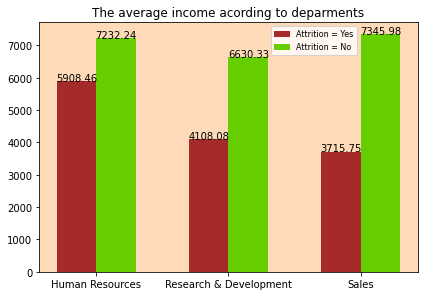

In [998]:
plt.figure(figsize=(20, 5))
index=np.arange(3)
bar_width = 0.3
fig, ax = plt.subplots()

r1=plt.bar(index,at_income['Average_income'],bar_width,color='#A52A2A',label = 'Attrition=Yes')
value = at_income['Average_income'].round(2)
for i in range(3):
        plt.text(i, value[i], value[i], ha = 'center')
        
r2=plt.bar(index+bar_width,noAt_income['Average_income'],bar_width,color='#66CD00',label = 'Attrition=No')
value = noAt_income['Average_income'].round(2)
for i in range(3):
        plt.text(i+bar_width, value[i], value[i], ha = 'center')
         
plt.xticks(index+0.15 , male_at['Department'],
      color = 'black',rotation = 0, horizontalalignment = 'center')

ax = plt.gca()
ax.set_facecolor('#FFDAB9')
plt.legend(labels=['Attrition = Yes','Attrition = No'], loc='upper right', 
           bbox_to_anchor=(0.85, 1),fontsize=8)
plt.tight_layout()
plt.title('The average income acording to deparments')
plt.show()

The graph above shows that the the group of attrition employees is the group who has the less income than the group who stays in the company. Therefore, it can be guessed that income maybes one of the factor which let to the decision of quitting the job of employees.

In [999]:
#prepating data for visualizing the attrition rate according to Job Satisfaction


satisfied=no_attrition.groupby(by='JobSatisfaction')
satisfied=pd.DataFrame(satisfied['JobSatisfaction'].count().reset_index(name='count'))
satisfiedAt=attrition.groupby(by='JobSatisfaction')
satisfiedAt=pd.DataFrame(satisfiedAt['JobSatisfaction'].count().reset_index(name='count'))
print(satisfied)
print(satisfiedAt)

   JobSatisfaction  count
0                1    223
1                2    234
2                3    369
3                4    407
   JobSatisfaction  count
0                1     66
1                2     46
2                3     73
3                4     52


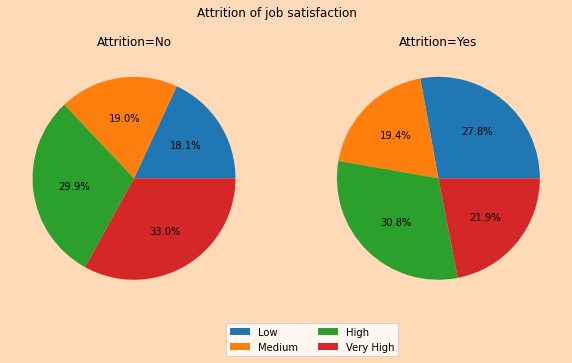

In [1000]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

ax1.pie(satisfied['count'],autopct='%1.1f%%')
ax2.pie(satisfiedAt['count'],autopct='%1.1f%%')

ax1.title.set_text('Attrition=No')
ax2.title.set_text('Attrition=Yes')

plt.suptitle('Attrition of job satisfaction')
plt.legend(labels=['Low','Medium','High','Very High'], loc='upper center', 
           bbox_to_anchor=(0.001, -0.05), ncol=2)
fig.set_facecolor("#FFDAB9")

Based on the graphs above, they are show that the employees who is very satisfied with job are less likely to quit the job comparing to the ones who has low level of job satisfaction

In [1001]:
#prepating data for visualizing the monthly income of gender acording to department

male=df[df['Gender'] == 'Male']
female=df[df['Gender'] == 'Female']

male_sale = male[male['Department']=='Sales']
male_RnD = male[male['Department']=='Research & Development']
male_HR = male[male['Department']=='Human Resources']

female_sale = female[female['Department']=='Sales']
female_RnD = female[female['Department']=='Research & Development']
female_HR = female[female['Department']=='Human Resources']
print(len(female))

588


In [1002]:
male_income=pd.DataFrame({'Average_income':[male_sale['MonthlyIncome'].mean(),male_RnD['MonthlyIncome'].mean(),male_HR['MonthlyIncome'].mean()]})
female_income=pd.DataFrame({'Average_income':[female_sale['MonthlyIncome'].mean(),female_RnD['MonthlyIncome'].mean(),female_HR['MonthlyIncome'].mean()]})
print(male_income['Average_income'].round(2))
print(female_income['Average_income'].round(2))

0    6949.65
1    6129.89
2    6371.02
Name: Average_income, dtype: float64
0    6972.13
1    6513.69
2    7264.00
Name: Average_income, dtype: float64


<Figure size 1440x360 with 0 Axes>

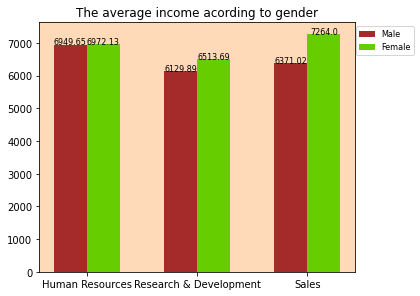

In [1003]:
plt.figure(figsize=(20, 5))
index=np.arange(3)
bar_width = 0.3
fig, ax = plt.subplots()

r1=plt.bar(index,male_income['Average_income'],bar_width,color='#A52A2A',label = 'Attrition=Yes')
value = male_income['Average_income'].round(2)
for i in range(3):
        plt.text(i, value[i], value[i], ha = 'center',fontsize=8)
        
r2=plt.bar(index+bar_width,female_income['Average_income'],bar_width,color='#66CD00',label = 'Attrition=No')
value = female_income['Average_income'].round(2)
for i in range(3):
        plt.text(i+bar_width, value[i], value[i], ha = 'center',fontsize=8)
         
plt.xticks(index+0.15 , male_at['Department'],
      color = 'black',rotation = 0, horizontalalignment = 'center')

ax = plt.gca()
ax.set_facecolor('#FFDAB9')
plt.legend(labels=['Male','Female'], loc='upper right', 
           bbox_to_anchor=(1.2, 1),fontsize=8)
plt.tight_layout()
plt.title('The average income acording to gender')
plt.show()

The graph above show that female is paid higher than male in R&D and Sales deparment. Meanwhile, HR is the department where both gender paid quite equally

In [1004]:
print(df['JobRole'].unique())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [1005]:
#prepating data for visualizing the monthly income of attrition acording to jobrole


at_sale = attrition[attrition['JobRole']=='Sales Executive']
at_sc = attrition[attrition['JobRole']=='Research Scientist']
at_lab = attrition[attrition['JobRole']=='Laboratory Technician']
at_fac = attrition[attrition['JobRole']=='Manufacturing Director']
at_health = attrition[attrition['JobRole']=='Healthcare Representative']
at_manager = attrition[attrition['JobRole']=='Manager']
at_rep = attrition[attrition['JobRole']=='Sales Representative']
at_research = attrition[attrition['JobRole']=='Research Director']
at_HR = attrition[attrition['JobRole']=='Human Resources']

no_sale = no_attrition[no_attrition['JobRole']=='Sales Executive']
no_sc = no_attrition[no_attrition['JobRole']=='Research Scientist']
no_lab = no_attrition[no_attrition['JobRole']=='Laboratory Technician']
no_fac = no_attrition[no_attrition['JobRole']=='Manufacturing Director']
no_health = no_attrition[no_attrition['JobRole']=='Healthcare Representative']
no_manager = no_attrition[no_attrition['JobRole']=='Manager']
no_rep = no_attrition[no_attrition['JobRole']=='Sales Representative']
no_research = no_attrition[no_attrition['JobRole']=='Research Director']
no_HR = no_attrition[no_attrition['JobRole']=='Human Resources']

In [1006]:
at_income=pd.DataFrame({'Average_income':[at_sale['MonthlyIncome'].mean(),at_sc['MonthlyIncome'].mean(),at_lab['MonthlyIncome'].mean(),
                                         at_fac['MonthlyIncome'].mean(),at_health['MonthlyIncome'].mean(),at_manager['MonthlyIncome'].mean(),
                                         at_rep['MonthlyIncome'].mean(),at_research['MonthlyIncome'].mean(),at_sale['MonthlyIncome'].mean()]})
noAt_income=pd.DataFrame({'Average_income':[no_sale['MonthlyIncome'].mean(),no_sc['MonthlyIncome'].mean(),no_lab['MonthlyIncome'].mean(),
                                           no_fac['MonthlyIncome'].mean(),no_health['MonthlyIncome'].mean(),no_manager['MonthlyIncome'].mean(),
                                           no_rep['MonthlyIncome'].mean(),no_research['MonthlyIncome'].mean(),no_HR['MonthlyIncome'].mean()]})
print(at_income['Average_income'].round(2))
print(noAt_income['Average_income'].round(2))

0     7489.00
1     2780.47
2     2919.26
3     7365.50
4     8548.22
5    16797.40
6     2364.73
7    19395.50
8     7489.00
Name: Average_income, dtype: float64
0     6804.62
1     3328.12
2     3337.22
3     7289.93
4     7453.56
5    17201.48
6     2798.44
7    15947.35
8     4391.75
Name: Average_income, dtype: float64


<Figure size 1440x360 with 0 Axes>

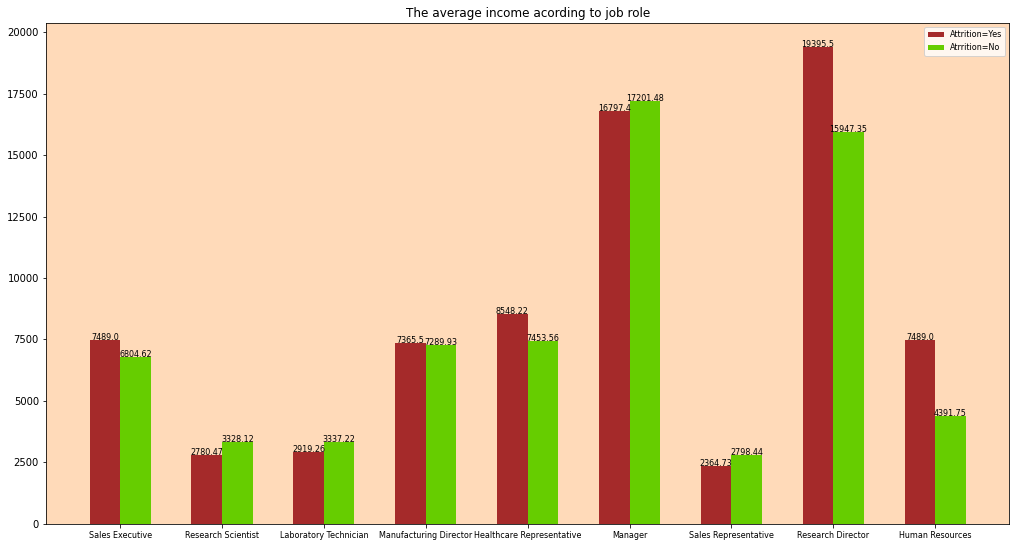

In [1007]:
plt.figure(figsize=(20, 5))
index=np.arange(9)
bar_width = 0.3
fig, ax = plt.subplots()
role=df['JobRole'].unique()

r1=plt.bar(index,at_income['Average_income'],bar_width,color='#A52A2A',label = 'Attrition=Yes')
value = at_income['Average_income'].round(2)
for i in range(9):
        plt.text(i, value[i], value[i], ha = 'center',fontsize=8)
        
r2=plt.bar(index+bar_width,noAt_income['Average_income'],bar_width,color='#66CD00',label = 'Attrition=No')
value = noAt_income['Average_income'].round(2)
for i in range(9):
        plt.text(i+bar_width, value[i], value[i], ha = 'center',fontsize=8)
         
plt.xticks(index+0.15 , role,
      color = 'black',rotation = 0, horizontalalignment = 'center', fontsize=8)

ax = plt.gca()
ax.set_facecolor('#FFDAB9')
plt.legend(labels=['Attrition=Yes','Atrrition=No'], loc='upper right', 
           bbox_to_anchor=(1, 1),fontsize=8)
plt.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.title('The average income acording to job role')
plt.show()

It is very odd that in some roles in the company, the employees who decided to quit the job had a higher paid than the ones who stay such as: Sales excutive, heathcare representative, research director and HR.

In [1008]:
#prepating data for visualizing the monthly income of gender acording to jobrole


male_sale = male[male['JobRole']=='Sales Executive']
male_sc = male[male['JobRole']=='Research Scientist']
male_lab = male[male['JobRole']=='Laboratory Technician']
male_fac = male[male['JobRole']=='Manufacturing Director']
male_health = male[male['JobRole']=='Healthcare Representative']
male_manager = male[male['JobRole']=='Manager']
male_rep = male[male['JobRole']=='Sales Representative']
male_research = male[male['JobRole']=='Research Director']
male_HR = male[male['JobRole']=='Human Resources']

female_sale = female[female['JobRole']=='Sales Executive']
female_sc = female[female['JobRole']=='Research Scientist']
female_lab = female[female['JobRole']=='Laboratory Technician']
female_fac = female[female['JobRole']=='Manufacturing Director']
female_health = female[female['JobRole']=='Healthcare Representative']
female_manager = female[female['JobRole']=='Manager']
female_rep = female[female['JobRole']=='Sales Representative']
female_research = female[female['JobRole']=='Research Director']
female_HR = female[female['JobRole']=='Human Resources']

In [1009]:
male_income=pd.DataFrame({'Average_income':[male_sale['MonthlyIncome'].mean(),male_sc['MonthlyIncome'].mean(),male_lab['MonthlyIncome'].mean(),
                                         male_fac['MonthlyIncome'].mean(),male_health['MonthlyIncome'].mean(),male_manager['MonthlyIncome'].mean(),
                                         male_rep['MonthlyIncome'].mean(),male_research['MonthlyIncome'].mean(),male_sale['MonthlyIncome'].mean()]})
female_income=pd.DataFrame({'Average_income':[female_sale['MonthlyIncome'].mean(),female_sc['MonthlyIncome'].mean(),female_lab['MonthlyIncome'].mean(),
                                           female_fac['MonthlyIncome'].mean(),female_health['MonthlyIncome'].mean(),female_manager['MonthlyIncome'].mean(),
                                           female_rep['MonthlyIncome'].mean(),female_research['MonthlyIncome'].mean(),female_HR['MonthlyIncome'].mean()]})
print(male_income['Average_income'].round(2))
print(female_income['Average_income'].round(2))

0     7033.12
1     3173.04
2     3232.41
3     7182.67
4     7589.30
5    17409.33
6     2587.20
7    16657.79
8     7033.12
Name: Average_income, dtype: float64
0     6764.31
1     3344.47
2     3246.91
3     7409.17
4     7433.80
5    16915.28
6     2671.95
7    15144.48
8     4540.69
Name: Average_income, dtype: float64


<Figure size 1440x360 with 0 Axes>

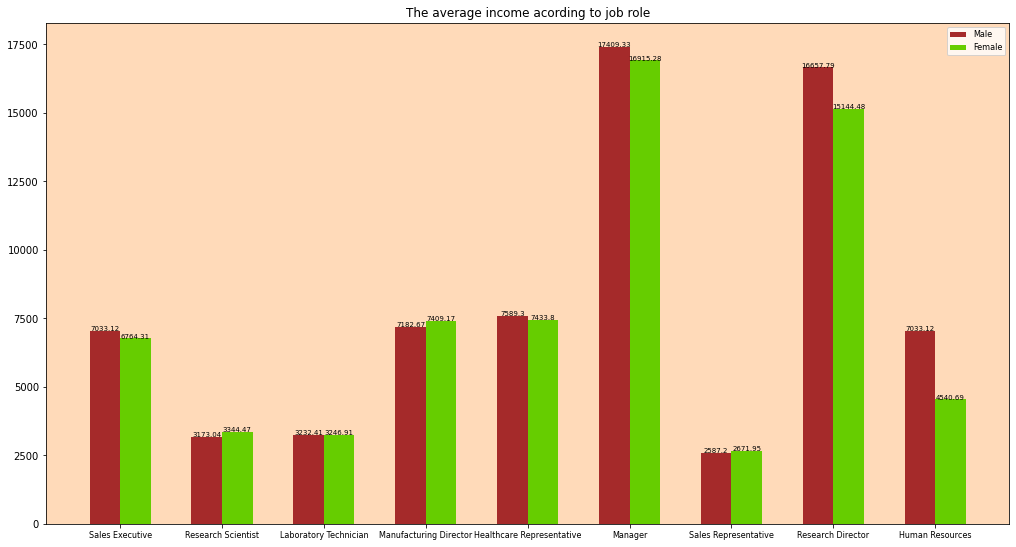

In [1010]:
plt.figure(figsize=(20, 5))
index=np.arange(9)
bar_width = 0.3
fig, ax = plt.subplots()
role=df['JobRole'].unique()

r1=plt.bar(index,male_income['Average_income'],bar_width,color='#A52A2A',label = 'Attrition=Yes')
value = male_income['Average_income'].round(2)
for i in range(9):
        plt.text(i, value[i], value[i], ha = 'center',fontsize=7)
        
r2=plt.bar(index+bar_width,female_income['Average_income'],bar_width,color='#66CD00',label = 'Attrition=No')
value = female_income['Average_income'].round(2)
for i in range(9):
        plt.text(i+bar_width, value[i], value[i], ha = 'center',fontsize=7)
         
plt.xticks(index+0.15 , role,
      color = 'black',rotation = 0, horizontalalignment = 'center', fontsize=8)

ax = plt.gca()
ax.set_facecolor('#FFDAB9')
plt.legend(labels=['Male','Female'], loc='upper right', 
           bbox_to_anchor=(1, 1),fontsize=8)
plt.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.title('The average income acording to job role')
plt.show()

The graph above shows that in most roles, the male employees are paid higher than female employess accept roles such as: research scientist, manufacturing director, and sales representative.

In [1011]:
#prepating data for visualizing box plot for oulier in continuous attributes

df_continuous=df[['Age','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsSinceLastPromotion','YearsWithCurrManager'
,'YearsAtCompany','TrainingTimesLastYear']]
print(df_continuous.columns)

Index(['Age', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearsAtCompany', 'TrainingTimesLastYear'],
      dtype='object')


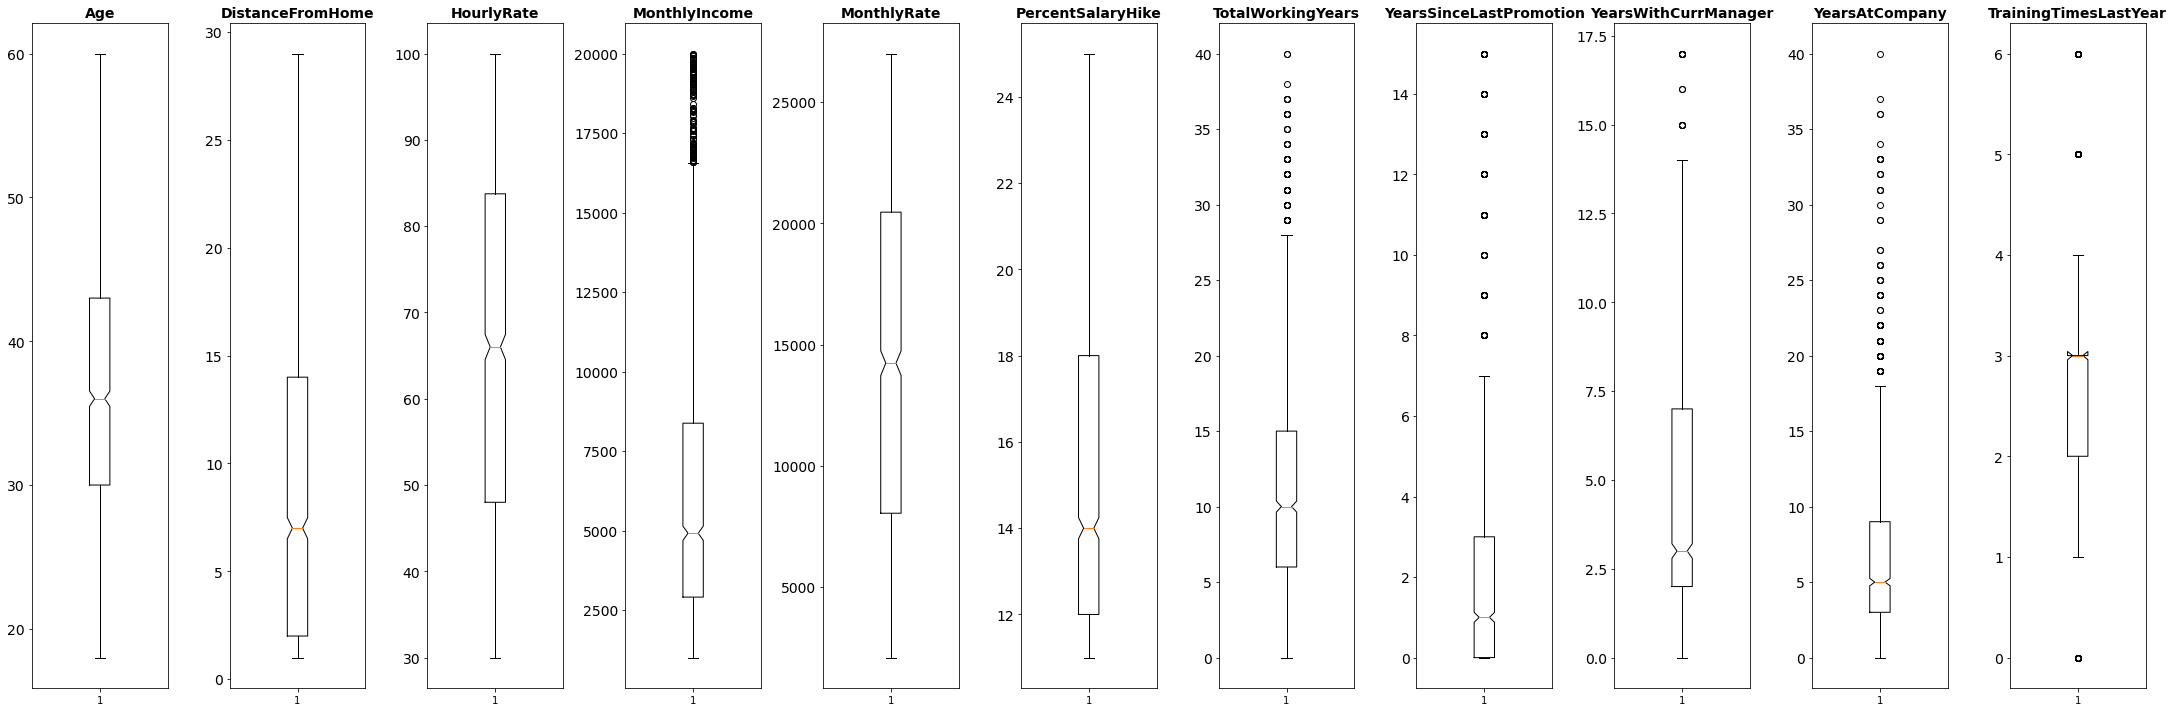

In [1012]:
fig, axs = plt.subplots(1, len(df_continuous.columns), figsize=(30,10))

for i,ax in enumerate(axs.flat):
    ax.boxplot(df_continuous.iloc[:,i], notch=True)
    ax.set_title(df_continuous.columns[i], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize =14)

plt.tight_layout()

The boxplots above show that the continuous attributes have a very different scale among them. Moreover, monthly income, total wworking years, year with current manager, years since last promotion and, and year at the company have a lot of ouliers. the oulier may affect to the logistic model which is used in this project. 

Text(0.5, 1.0, 'The monthly income with working years according to attrition')

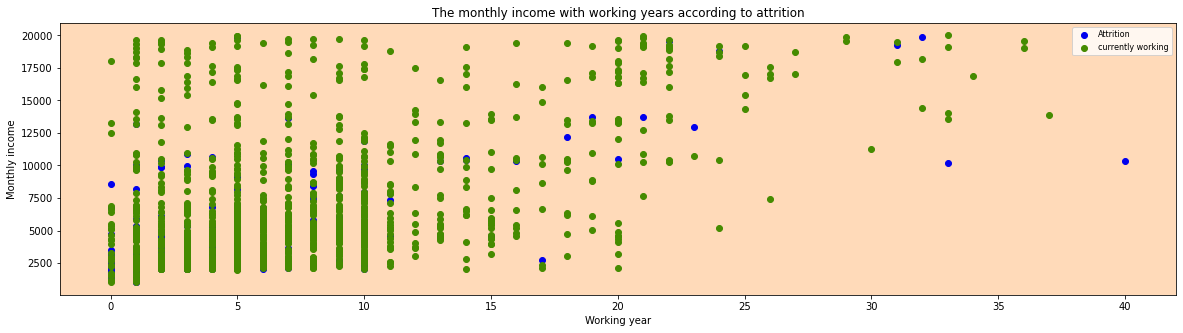

In [1013]:
#prepating data for visualizing the monthly income of gender according to attrition


plt.figure(figsize=(20, 5))
ax = plt.gca()

ax.scatter(attrition['YearsAtCompany'], attrition['MonthlyIncome'], color="#0000EE")
ax.scatter(no_attrition['YearsAtCompany'], no_attrition['MonthlyIncome'], color="#458B00")

ax.legend(labels=['Attrition','currently working'], loc='upper right', 
           bbox_to_anchor=(1, 1),fontsize=8)
ax.set_xlabel('Working year')
ax.set_ylabel('Monthly income')
ax.set_facecolor('#FFDAB9')
plt.title('The monthly income with working years according to attrition')

As can be seen in the graph, most of the attrition has lower working year with monthly income. While the seniors with higer income are less likely to quit the job.

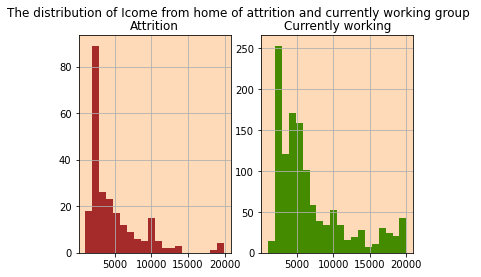

In [1014]:
fig, axes = plt.subplots(1, 2)

attrition['MonthlyIncome'].hist(bins=20, ax=axes[0], color='#A52A2A')
no_attrition['MonthlyIncome'].hist(bins=20, ax=axes[1], color='#458B00')

fig.suptitle("The distribution of Icome from home of attrition and currently working group ", fontsize=12)
axes[0].set_title('Attrition')
axes[1].set_title('Currently working')

axes[0].set_facecolor('#FFDAB9')
axes[1].set_facecolor('#FFDAB9')

The graphs above show the distribution of income between attrition and not_attrition group in the company. There is no different in the distribution between them when they are both right skewd. 

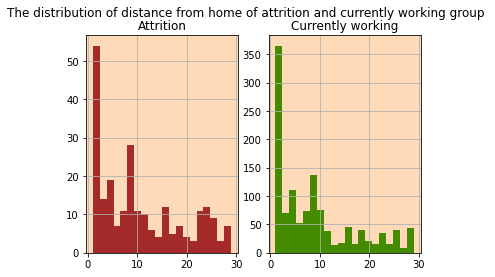

In [1015]:
fig, axes = plt.subplots(1, 2)

attrition['DistanceFromHome'].hist(bins=20, ax=axes[0], color='#A52A2A')
no_attrition['DistanceFromHome'].hist(bins=20, ax=axes[1], color='#458B00')

fig.suptitle("The distribution of distance from home of attrition and currently working group ", fontsize=12)
axes[0].set_title('Attrition')
axes[1].set_title('Currently working')

axes[0].set_facecolor('#FFDAB9')
axes[1].set_facecolor('#FFDAB9')

The graphs above show the distribution of Distance from Home between attrition and not_attrition group in the company. There is no different in the distribution between them when they are both right skewd. 

In [1016]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [1017]:
#encode the attributes which are not numeric to the scale of 0,1,2,3...

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

display(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


<AxesSubplot:>

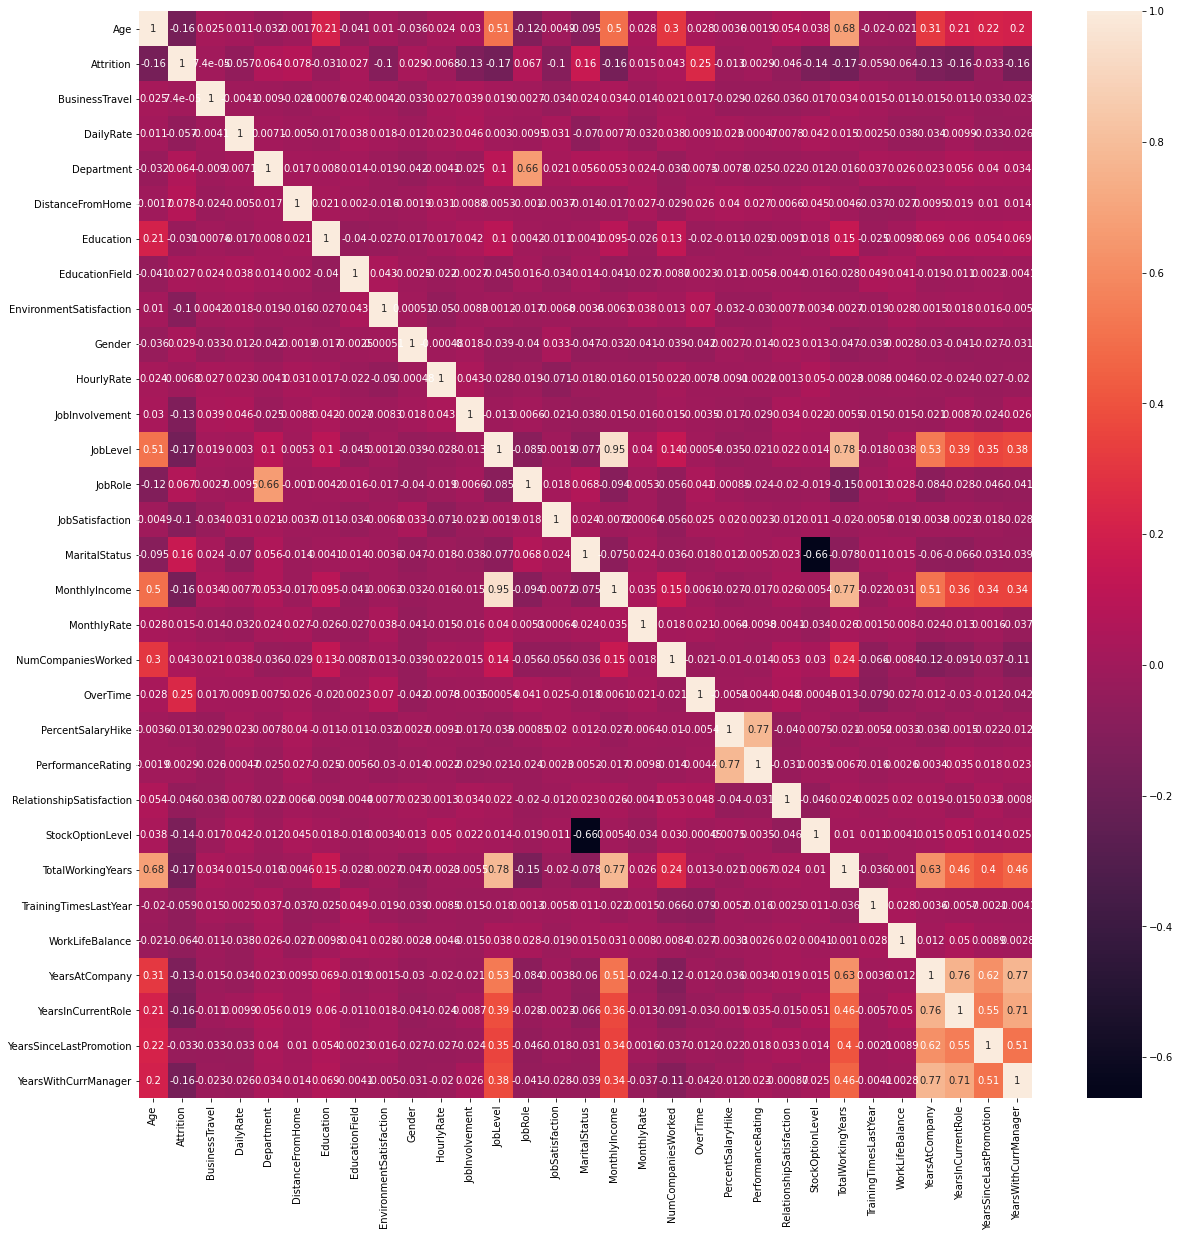

In [1018]:
#Heat map for the correlation between attributes

import seaborn as sn

plt.figure(figsize=(20,20))
sn.heatmap(df.corr(), annot=True)

We can see that YearsAtCompany, YearinCurrentRole, YearSinceLastPromotion, YearWithCurrManager are highly correlated. In addition, Total working years, monthly income, ands joblevel are highly correlated. The correlated attributes may let to the unstable in logistic model. Therefore, We can drop most of the attributes and keep only 1 attribute in the correlated group for the model

In [1019]:
#delete the attributes which are correlated
df=df.drop(columns=['YearsWithCurrManager','YearsInCurrentRole','JobLevel', 'PercentSalaryHike', 'TotalWorkingYears', 'JobLevel'])

<AxesSubplot:>

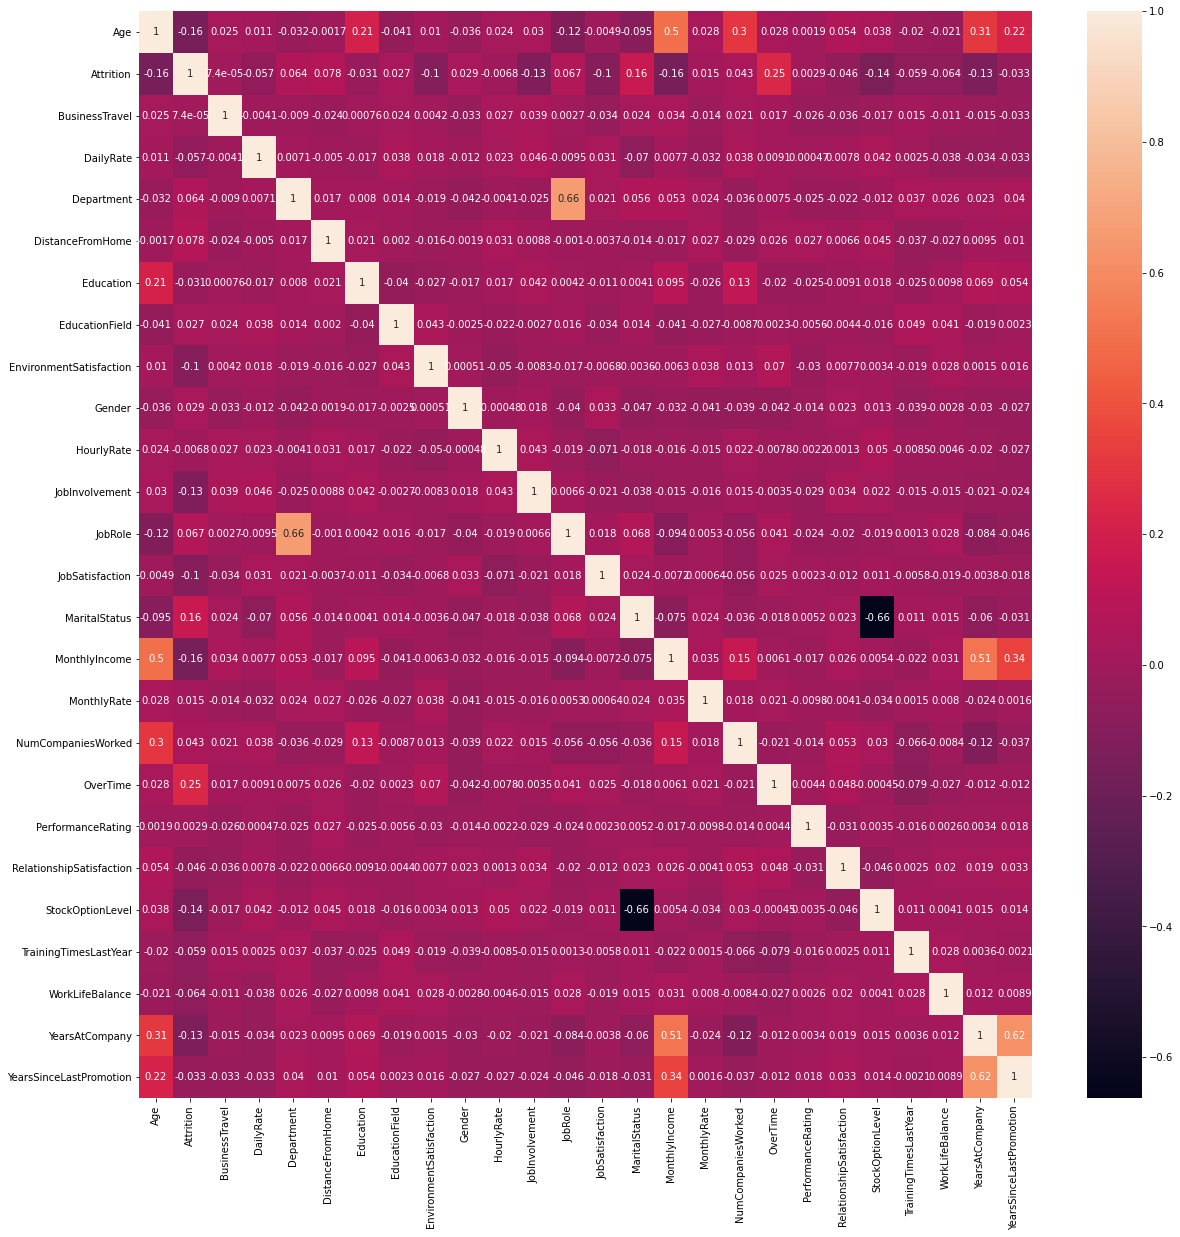

In [1020]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(), annot=True)

In [1021]:
#Convert the attributes to the range from 0-1 for the models

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

numeric_cols = list(df.select_dtypes(include=['int', 'float', 'int64', 'float64', 
                                                  'int32', 'float32', 'int16', 'float16']).columns)

df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])
                            

display(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.698053,0.888889,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.150,0.000000
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,0.916001,0.111111,0.0,1.0,1.000000,0.333333,0.500000,0.666667,0.250,0.066667
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.012126,0.666667,1.0,0.0,0.333333,0.000000,0.500000,0.666667,0.000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.845814,0.111111,1.0,0.0,0.666667,0.000000,0.500000,0.666667,0.200,0.200000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.583738,1.000000,0.0,0.0,1.000000,0.333333,0.500000,0.666667,0.050,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.5,0.559771,0.5,0.785714,0.25,0.6,0.666667,1.0,...,0.409396,0.444444,0.0,0.0,0.666667,0.333333,0.500000,0.666667,0.125,0.000000
1466,0.500000,0.0,1.0,0.365784,0.5,0.178571,0.00,0.6,1.000000,1.0,...,0.777474,0.444444,0.0,0.0,0.000000,0.333333,0.833333,0.666667,0.175,0.066667
1467,0.214286,0.0,1.0,0.037938,0.5,0.107143,0.50,0.2,0.333333,1.0,...,0.123670,0.111111,1.0,1.0,0.333333,0.333333,0.000000,0.666667,0.150,0.000000
1468,0.738095,0.0,0.5,0.659270,1.0,0.035714,0.50,0.6,1.000000,1.0,...,0.447661,0.222222,0.0,0.0,1.000000,0.000000,0.500000,0.333333,0.225,0.000000


Because the output (attrition) is binary attribute. Therefore, we can use the logistic regression and decision tree to predict the attrition from the dataset.

In [1022]:
#prepare the label and attributes for the model
output = df['Attrition']
training = df.drop(columns='Attrition')

In [1023]:
from sklearn.model_selection import train_test_split
#split the data
train, test, train_labels, test_labels = train_test_split(training, output, test_size = 0.1)

In [1024]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#Create the function for lopgistic regression with corss validation and impotance features
def logistic(X,Y,Z,K):
    #applied the model
    logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X,Y)
    
    #cross validation
    scores = cross_val_score(logistic_model, X, Y, cv=10)
    
    #features importance and visualise it
    importance = abs(logistic_model.coef_[0])
    importance = 100.0 * (importance / importance.max())
    sorted_idx = np.argsort(importance)
   
    sorted_indices = np.argsort(importance)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(train.shape[1]), importance[sorted_indices], align='center')
    plt.xticks(range(train.shape[1]), train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    
    #Confusion maxtrix
    cm = confusion_matrix(K,logistic_model.predict(Z))
    classes = ["0","1"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix")
    disp = disp.plot(ax=ax)
    
    print("Train Accuracy :" + str(np.average(scores)))
    print("Test Accuracy :" + str(accuracy_score(logistic_model.predict(Z),K)))
    print("F1-score :" + str(f1_score(K,logistic_model.predict(Z))))

Train Accuracy :0.8677375256322625
Test Accuracy :0.8435374149659864
F1-score :0.4651162790697674


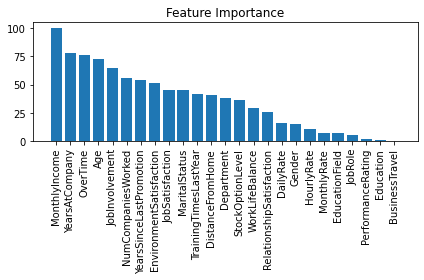

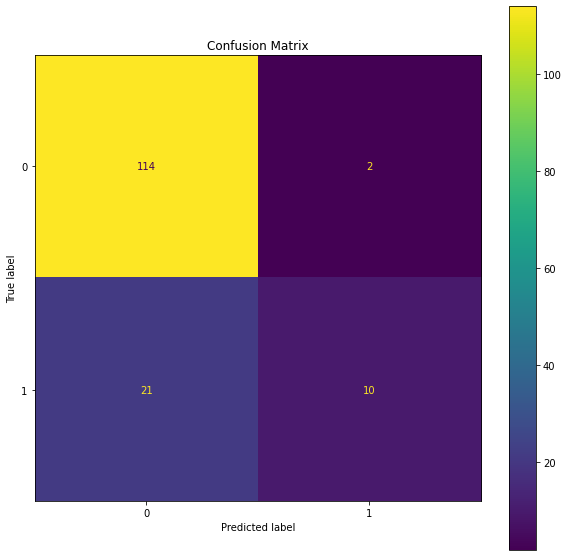

In [1025]:
logistic(train,train_labels,test, test_labels)

In [1026]:
from sklearn.tree import DecisionTreeClassifier
#Create the function for decision tree classifier with corss validation and impotance features
def decisionTree(X,Y,Z,K):
    decisionTree_model = DecisionTreeClassifier(random_state=0, criterion='gini').fit(X,Y)
    
    #cross validation
    scores = cross_val_score(decisionTree_model, X, Y, cv=10)
    
    #features importance and visualise it
    importance = decisionTree_model.feature_importances_
    sorted_indices = np.argsort(importance)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(train.shape[1]), importance[sorted_indices], align='center')
    plt.xticks(range(train.shape[1]), train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    
    #Confusion maxtrix
    cm1 = confusion_matrix(test_labels,decisionTree_model.predict(test))
    classes = ["0","1"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=classes)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix")
    disp = disp.plot(ax=ax)

    print("Train Accuracy :" + str(np.average(scores)))
    print("Test Accuracy :" + str(accuracy_score(decisionTree_model.predict(Z),K)))
    print("F1-score :" + str(f1_score(K,decisionTree_model.predict(Z))))

Train Accuracy :0.8125882889040785
Test Accuracy :0.7482993197278912
F1-score :0.3272727272727273


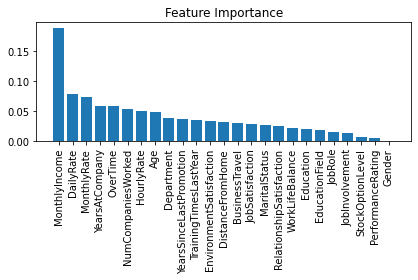

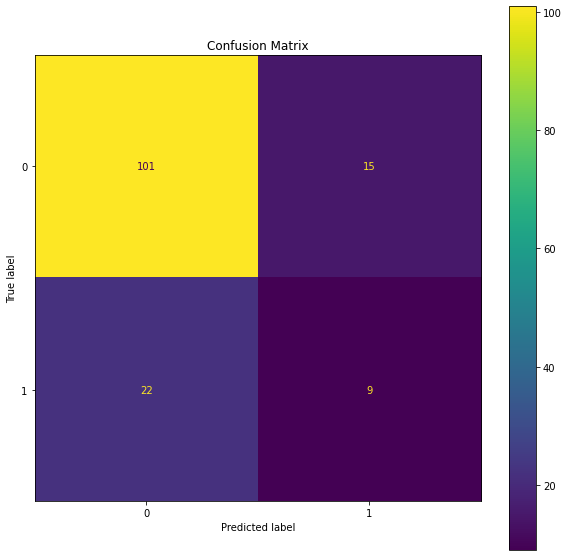

In [1027]:
decisionTree(train,train_labels,test, test_labels)

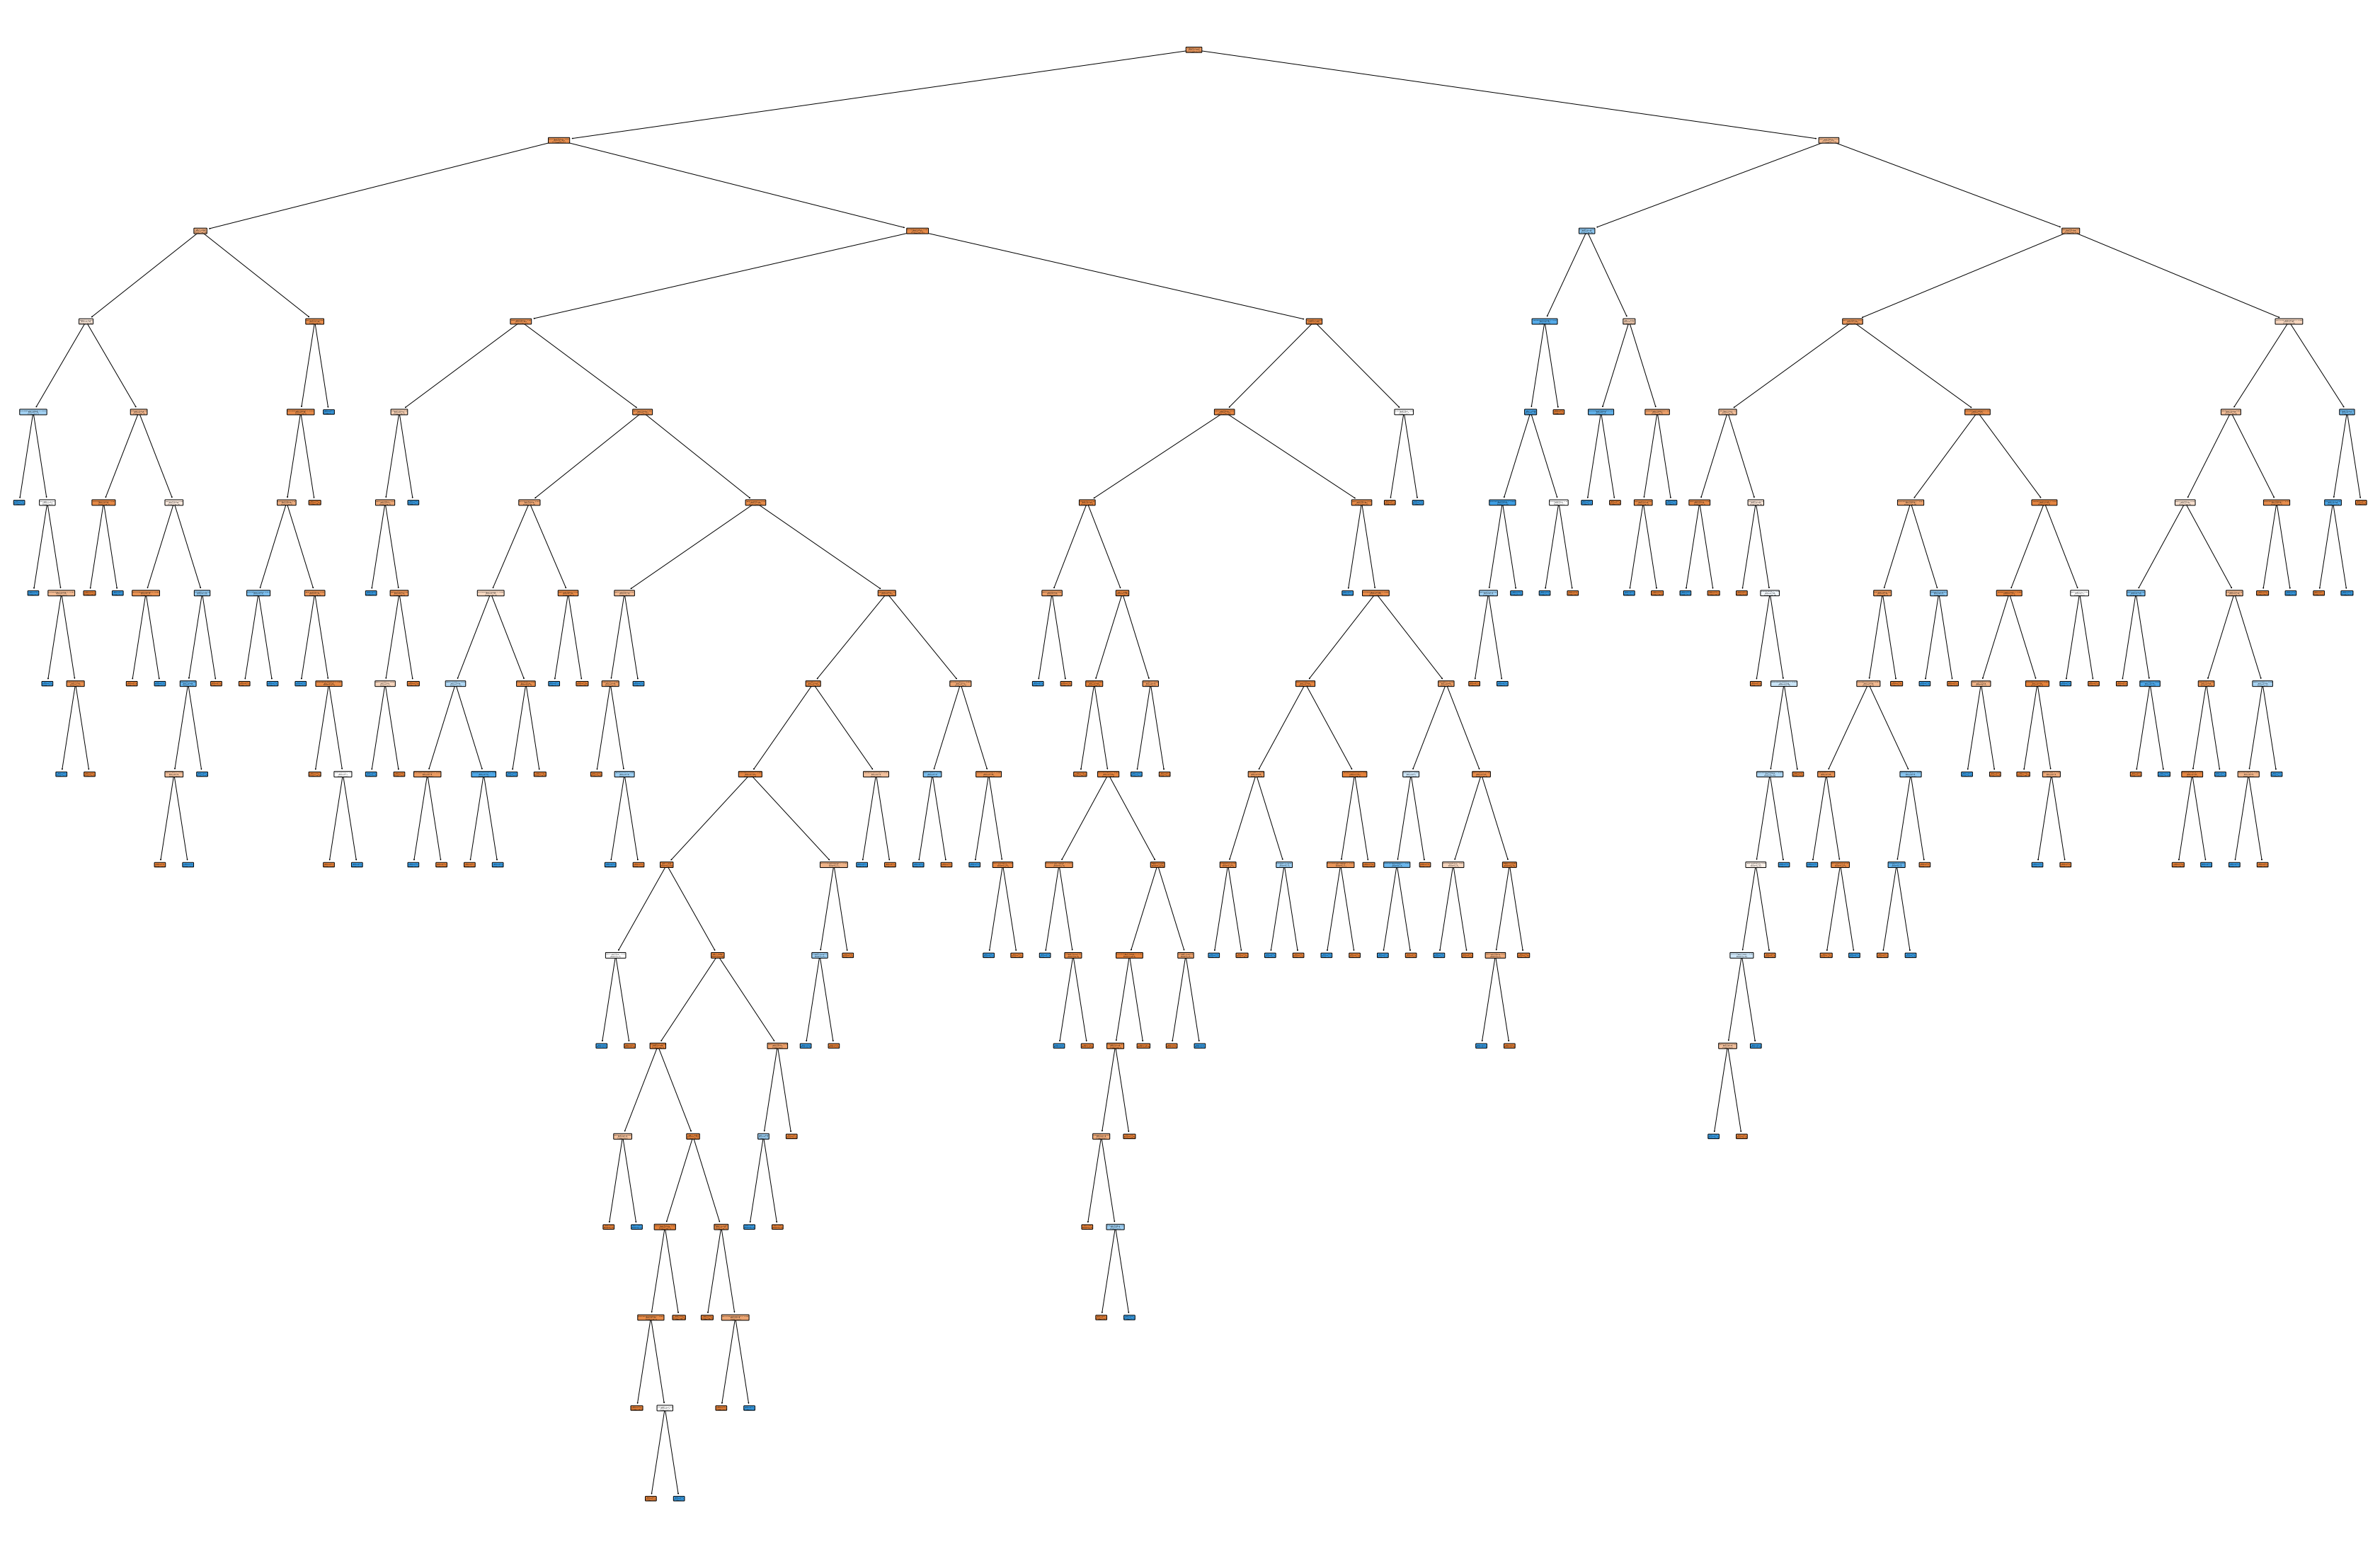

In [1028]:
from sklearn import tree

dtc = DecisionTreeClassifier(random_state=0, criterion='gini')

dtc.fit(train, train_labels)

fig = plt.figure(figsize=(60,40))
tree.plot_tree(dtc, 
          feature_names=training.columns,
          class_names=str(output), 
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [1029]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.inspection import permutation_importance
#Create the function for MultinomialNB classifier with corss validation and impotance features
def gaussian(X,Y,Z,K):
    NB_model = BernoulliNB().fit(X,Y)
    
    #cross validation
    scores = cross_val_score(NB_model, X, Y, cv=10)
    
    #features importance and visualise it
    importance = abs(NB_model.coef_[0])
    importance = 100.0 * (importance / importance.max())
    sorted_idx = np.argsort(importance)
   
    sorted_indices = np.argsort(importance)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(train.shape[1]), importance[sorted_indices], align='center')
    plt.xticks(range(train.shape[1]), train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    
    #Confusion maxtrix
    cm2 = confusion_matrix(test_labels,NB_model.predict(test))
    classes = ["0","1"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=classes)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix")
    disp = disp.plot(ax=ax)
    
    print("Train Accuracy :" + str(np.average(scores)))
    print("Test Accuracy :" + str(accuracy_score(NB_model.predict(Z),K)))
    print("F1-score :" + str(f1_score(K,NB_model.predict(Z))))

Train Accuracy :0.854898610161768
Test Accuracy :0.8163265306122449
F1-score :0.30769230769230765


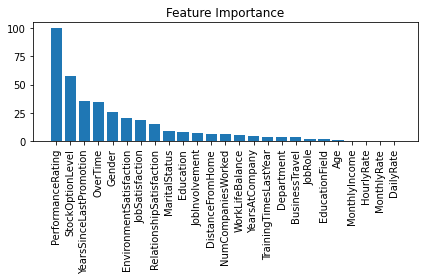

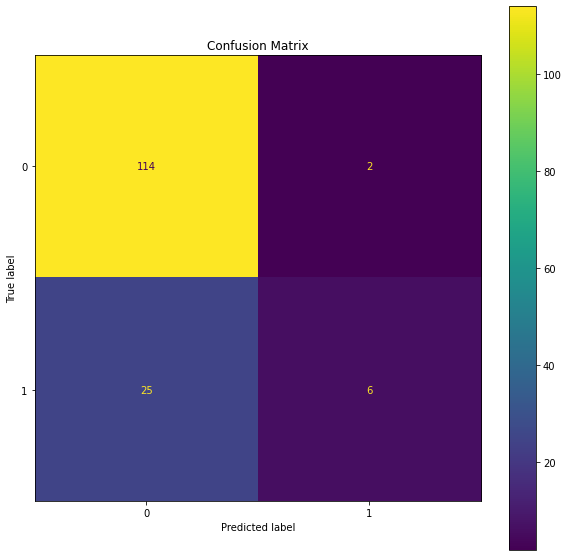

In [1030]:
gaussian(train,train_labels,test, test_labels)

In [1031]:
display(len(attrition))
display(len(no_attrition))

237

1233

As can be seen from logistic and Naive Bayes do not have many differnet in the accuracy score, while decision tree has a lower accuracy score at 74.82%. The accuracy of logistic regression, decision tree and Naive Bayes are: 84.35%, 74.83% and 81.63%, respectively based on the confusion matrix. However, because the data is imbalance (237 attrition vs 1233 no attrition). It is should better to use F1-score. We have F1 score of 3 models which are: 46.51%, 37.72%,and 30.77%, respectively. Therefore, the logistic regression is a better model with a higher F1-score. 
Based on the feature importances from the decisiontree and logistic regression model, an employee's age, income, overitme, and daily rate were among the most influential predictors of employee attrition. However, Naive Bayes model suggests that performing rating, stock option level, and over wprking time are the attributes have a major affect on the attition. 
To conclution, the logistic regression seems like a better choice with a higher accuracy and F1-score. 